In [48]:
#import required modules in the project
import xlrd

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as pltfig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    


In [20]:
#df=pd.ExcelFile()
df = pd.read_excel("C:/Users/adm/Documents/Python Scripts/Dataset/Set1.xls")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,Result
0,40,1.29,9.99,2,20,74,96,1.28,16.57,4.15,5.69,2331
1,26,1.09,8.78,5,12,20,32,1.54,17.60,5.25,6.75,2740
2,30,1.36,9.39,5,14,50,64,1.44,17.91,4.87,6.21,2670
3,40,1.42,10.40,3,32,84,119,1.34,15.60,3.82,5.83,2390
4,24,0.62,8.25,5,8,13,21,1.54,18.16,5.16,6.74,2966


In [26]:
df.shape #(2178, 12)

df.isnull().sum() #

(2178, 12)

In [28]:

X = df.drop('Result', axis = 1)
Y = df['Result']

In [30]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11
0,40,1.29,9.99,2,20,74,96,1.28,16.57,4.15,5.69
1,26,1.09,8.78,5,12,20,32,1.54,17.60,5.25,6.75
2,30,1.36,9.39,5,14,50,64,1.44,17.91,4.87,6.21
3,40,1.42,10.40,3,32,84,119,1.34,15.60,3.82,5.83
4,24,0.62,8.25,5,8,13,21,1.54,18.16,5.16,6.74


In [31]:
Y.head()

0    2331
1    2740
2    2670
3    2390
4    2966
Name: Result, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.80, random_state = 5)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(435, 11)
(1743, 11)
(435,)
(1743,)


In [35]:
# Generate data
np.random.seed(2)
X = df
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,Result
0,40,1.29,9.99,2,20,74,96,1.28,16.57,4.15,5.69,2331
1,26,1.09,8.78,5,12,20,32,1.54,17.60,5.25,6.75,2740
2,30,1.36,9.39,5,14,50,64,1.44,17.91,4.87,6.21,2670
3,40,1.42,10.40,3,32,84,119,1.34,15.60,3.82,5.83,2390
4,24,0.62,8.25,5,8,13,21,1.54,18.16,5.16,6.74,2966


In [41]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
cnt=0
for i in (km1.labels_):
    cnt=cnt+1
print(cnt)
    

2178


In [44]:
pd.Series(km1.labels_).value_counts()

1    1400
0     778
dtype: int64

In [46]:
km1.cluster_centers_

array([[2.98354756e+01, 1.08136247e+00, 9.24408740e+00, 4.15424165e+00,
        1.60128535e+01, 4.53341902e+01, 6.17300771e+01, 1.40267352e+00,
        1.82450900e+01, 4.90331620e+00, 6.20863753e+00, 2.88232391e+03],
       [3.83357143e+01, 9.85400000e-01, 9.94318571e+00, 2.92857143e+00,
        2.62257143e+01, 7.39128571e+01, 1.01687143e+02, 1.36525714e+00,
        1.67609143e+01, 4.29122857e+00, 5.95955714e+00, 2.52468143e+03]])

TypeError: unhashable type: 'slice'

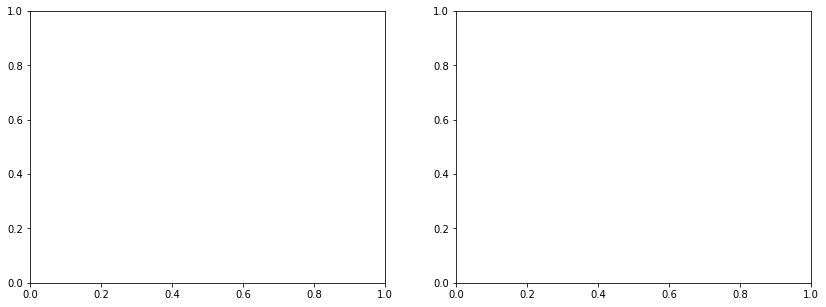

In [72]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))



ax1.scatter(X[:,11], X[:,12], s=10, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)


TypeError: unhashable type: 'slice'